## Homework 2 - DSE 220: Machine Learning
Download the MNIST train and test data from github along with their corresponding label files. The train and test data consist of 6000 and 1000 binarized MNIST images respectively.

In [2]:
import pandas as pd
import numpy as np
X_train = pd.read_csv('mnist_train_data.csv', header=None)
y_train = pd.read_csv('mnist_train_labels.csv', header=None)[0]
X_test = pd.read_csv('mnist_test_data.csv', header=None)
y_test = pd.read_csv('mnist_test_labels.csv', header=None)[0]

### Generative Learning
Please don’t use the direct function from scikit-learn library for questions 1, 2, 3 and write your own implementation for them.

**Question 1**: Compute and report the prior probabilities πj for all labels. (10 marks)

In [2]:
digit_counts = y_train.value_counts()
total_count = len(y_train)
labels = y_train.unique()
labels.sort()
priors = {}
for j in labels:
    priors[j] = digit_counts[j]/total_count
    print("prior probability for label {} is {:.4f}".format(j, priors[j]))

prior probability for label 0 is 0.0987
prior probability for label 1 is 0.1118
prior probability for label 2 is 0.0968
prior probability for label 3 is 0.1013
prior probability for label 4 is 0.1038
prior probability for label 5 is 0.0857
prior probability for label 6 is 0.1013
prior probability for label 7 is 0.1085
prior probability for label 8 is 0.0918
prior probability for label 9 is 0.1002


**Question 2**: For each pixel Xi and label j, compute Pji = P(Xi = 1|y = j) (Use
the maximum likelihood estimate shown in class). Use Laplacian Smoothing for
computing Pji. Report the highest Pji for each label j. (15 marks)

In [3]:
num_pixels = X_train.shape[1]
num_instance_j = np.zeros(len(labels))
num_instance_ji = np.zeros((len(labels), num_pixels))
P_ji = np.zeros((len(labels), num_pixels))
for j in labels:
    num_instance_j = digit_counts[j]
    for i in range(num_pixels):
        instances_j = X_train[y_train==j]
        pixel_value_count = instances_j[i].value_counts()
        num_instance_ji[j][i] = pixel_value_count[1.0] if 1.0 in pixel_value_count else 0
        P_ji[j][i] = (num_instance_ji[j][i]+1)/(num_instance_j+2)
    print("highest Pji for label {} is {:.4f}".format(j, P_ji[j].max()))

highest Pji for label 0 is 0.8519
highest Pji for label 1 is 0.9851
highest Pji for label 2 is 0.7290
highest Pji for label 3 is 0.8082
highest Pji for label 4 is 0.8496
highest Pji for label 5 is 0.7112
highest Pji for label 6 is 0.8492
highest Pji for label 7 is 0.7948
highest Pji for label 8 is 0.8752
highest Pji for label 9 is 0.8673


**Question 3**: Use naive bayes (as shown in lecture slides) to classify the test
data. Report the accuracy. (5 marks)

In [5]:
import math
def classify(x):
    posterior = np.zeros(len(labels))
    for j in labels:
        posterior[j] = math.log(priors[j])
        for i in range(num_pixels):
            posterior[j] += x[i]*math.log(P_ji[j][i]) + (1 - x[i])*math.log(1-P_ji[j][i])
    return np.argmax(posterior)
y_pred = np.array([classify(X_test.T[i]) for i in range(len(X_test))])
accuracy = np.sum(y_pred == y_test)*1.0/len(y_test)
print("test accuracy is: {:.4f}".format(accuracy))

test accuracy is: 0.8090


Note: You can use the scikit-learn function from Question 4 onwards

**Question 4**: Compute the confusion matrix (as shown in the lectures) and report
the top 3 pairs with most (absolute number) incorrect classifications. (10 marks)

In [6]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
mat1 = np.copy(mat)
np.fill_diagonal(mat1,0)
max_index = mat1.ravel().argsort()[-3:][::-1]
top_pairs = np.unravel_index(max_index, mat.shape)
print("top 3 pairs(true, predict) with most incorrect classification:")
print(list(zip(top_pairs[0], top_pairs[1])))

[[ 74   0   0   0   0   5   2   0   4   0]
 [  0 120   0   0   0   4   1   0   1   0]
 [  1   7  88   4   0   1   2   3   8   2]
 [  0   2   1  86   1   6   3   2   3   3]
 [  1   1   1   0  83   0   2   0   1  21]
 [  3   1   1  11   2  62   2   3   1   1]
 [  3   0   4   0   3   4  73   0   0   0]
 [  0   6   2   0   3   1   0  77   3   7]
 [  0   2   2   9   4   3   1   2  61   5]
 [  0   1   0   1   4   0   0   0   3  85]]
top 3 pairs(true, predict) with most incorrect classification:
[(4, 9), (5, 3), (8, 3)]


**Question 5**: Visualizing mistakes: Print two MNIST images from the test data that your classifier misclassified. Write both the true and predicted labels for both of these misclassified digits. (10 marks)

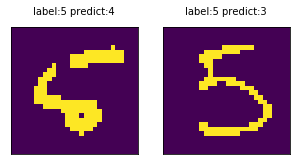

In [9]:
import matplotlib.pyplot as plt
failed = X_test[y_test != y_pred]

fig, ax = plt.subplots(1, 2, figsize=(5, 2*5))
fig.subplots_adjust(hspace=0.6)
for axi,i in enumerate(failed.index[:2]):
    image = failed.T[i]
    label,predict = y_test[i],y_pred[i]
    title = "label:{} predict:{}".format(label,predict)
    ax[axi].axes.get_xaxis().set_visible(False)
    ax[axi].axes.get_yaxis().set_visible(False)
    ax[axi].axes.get_xaxis().set_ticks([])
    ax[axi].axes.get_yaxis().set_ticks([])
    ax[axi].matshow(image.values.reshape(28,28))
    ax[axi].set_title(title, size=10)
plt.show()

Now, we will implement Gaussian Mixture Model and Linear Discriminant Analysis on the breast cancer data (sklearn.datasets.load breast cancer) available in sklean.datasets. Load the data and split it into train-validation-test (40-20-40 split). Don’t shuffle the data, otherwise your results will be different.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=5)

**Question 6**: Implement Gaussian Mixture model on the data as shown in class. Tune the covariance type parameter on the validation data. Use the selected value to compute the test accuracy. As always, train the model on train+validation data to compute the test accuracy. (10 mark)

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

labels = np.unique(y_train)
print("number of components: {}".format(len(labels)))

accuracy = 0
best_cov_type = ''
for cov in ['full', 'tied', 'diag', 'spherical']:
    clf = GaussianMixture(n_components=len(labels), covariance_type=cov)
    clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in labels])
    clf.fit(X_train, y_train)
    pred = clf.predict(X_val)
    accu = accuracy_score(y_val, pred)
    print("val accuracy for {} is {}".format(cov, accu))
    if accu > accuracy:
        best_cov_type = cov
        accuracy = accu
print("Best covariance type based on validation is: {}".format(best_cov_type))
clf = GaussianMixture(n_components=len(labels), covariance_type=best_cov_type)
X_train_valid = np.concatenate([X_train, X_val])
y_train_valid = np.concatenate([y_train, y_val])
clf.means_init = np.array([X_train_valid[y_train_valid == i].mean(axis=0) for i in labels])
clf.fit(X_train_valid, y_train_valid)
y_pred = clf.predict(X_test)
test_accuracy = np.sum(y_pred == y_test)/len(y_test)
print("test accuracy is: {:.4f}".format(test_accuracy))

number of components: 2
val accuracy for full is 0.831858407079646
val accuracy for tied is 0.8407079646017699
val accuracy for diag is 0.9203539823008849
val accuracy for spherical is 0.8849557522123894
Best covariance type based on validation is: diag
test accuracy is: 0.9167


**Question 7**: Apply Linear Discriminant Analysis model on the train+validation data and report the accuracy obtained on test data. Report the transformation matrix (w) along with the intercept. (5 mark)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Intialize
clf = LinearDiscriminantAnalysis()
X_train_valid = np.concatenate((X_train, X_val))
y_train_valid = np.concatenate((y_train, y_val))
clf.fit(X_train_valid, y_train_valid)
# Test
y_pred = clf.predict(X_test)
print('Test accuracy = {:.4f}'.format(np.sum(y_pred == y_test)/len(y_test)))
print('The transformation matrix(w) is:\n', clf.coef_)
print('The intercept is:', clf.intercept_)

Test accuracy = 0.9649
The transformation matrix(w) is:
 [[  1.34830116e+00  -1.27341243e-01  -1.35844403e-01  -2.44423845e-04
   -2.24362884e+01   8.56018583e+01   1.38546510e+01  -1.22119406e+02
    1.60043667e+01   7.42980762e+00  -1.47932822e+01   4.82925722e-01
    1.73467322e+00  -1.63578761e-02  -4.69433577e+02  -1.95981999e+00
    1.60421869e+01  -9.77881013e+01  -6.13801471e+01   5.59104687e+02
   -1.26194721e+00  -1.99981038e-01  -2.62323627e-01   1.92964678e-02
    3.19490554e+01   4.09464513e+00  -1.26545911e+01  -9.32147959e+00
   -1.48664190e+01  -1.71510006e+02]]
The intercept is: [ 51.85532978]


### Evaluating Classifiers
**Question 8**: Load the digits dataset (scikit-learn’s toy dataset) and take the last
1300 samples as your test set. Train a K-Nearest Neighbor (k=5, linf distance)
model and then without using any scikit-learn method, report the final values
for Specificity, Sensitivity, TPR, TNR, FNR, FPR, Precision and Recall for
Digit 3 (this digit is a positive, everything else is a negative). (15 marks)

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X,y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1300, random_state=5)

clf = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

In [20]:
metrics = {}
TP = np.sum(np.logical_and(y_pred == y_test, y_pred == 3))
TN = np.sum(np.logical_and(y_pred == y_test, y_test != 3))
FN = np.sum(np.logical_and(y_pred != 3, y_test == 3))
FP = np.sum(np.logical_and(y_pred == 3, y_test != 3))
metrics['specificity'] = TN / (TN + FP)
metrics['sensitivity'] = TP / (TP + FN)
metrics['TPR'] = metrics['sensitivity']
metrics['TNR'] = metrics['specificity']
metrics['FNR'] = 1 - metrics['TPR']
metrics['FPR'] = 1 - metrics['TNR']
metrics['precision'] = TP / (TP + FP)
metrics['recall'] = metrics['TPR']
print("reporting metrics for digit 3:")
for k,v in metrics.items():
    print("{}: {}".format(k,v)) 

reporting metrics for digit 3:
specificity: 0.995507637017071
sensitivity: 0.916030534351145
TPR: 0.916030534351145
TNR: 0.995507637017071
FNR: 0.08396946564885499
FPR: 0.004492362982928988
precision: 0.96
recall: 0.916030534351145


### Regression
An ablation experiment consists of removing one feature from an experiment,
in order to assess the amount of additional information that feature provides
above and beyond the others. For this section, we will use the diabetes dataset
from scikit-learn’s toy datasets. Split the data into training and testing data as
a 90-10 split with random state of 10.

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

**Question 9**: Perform least squares regression on this dataset. Report the mean
squared error and the mean absolute error on the test data. (5 marks)

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# add one column
X_train = np.c_[X_train, np.ones(len(X_train))]
X_test = np.c_[X_test, np.ones(len(X_test))]

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

# Make predictions on the test data
predictions = np.dot(X_test, theta)

# MSE calculation
print ("MSE: {}".format(mean_squared_error(y_test, predictions)))
# MAE calculation
print ("MAE: {}".format(mean_absolute_error(y_test, predictions)))

MSE: 2155.9646510319635
MAE: 36.31813369867867


**Question 10**: Repeat the experiment from Question 10 for all possible values of ablation (i.e., removing the feature 1 only, then removing the feature 2 only, and so on). Report all MSEs. (10 marks)

In [23]:
mse = np.zeros(X_train.shape[1]-1)
for i in range(X_train.shape[1]-1):
    X_train1 = np.delete(X_train, i, 1)
    X_test1 = np.delete(X_test, i, 1)
    # Least squares regression
    theta,residuals,rank,s = np.linalg.lstsq(X_train1, y_train)
    # Make predictions on the test data
    predictions = np.dot(X_test1, theta)
    # MSE calculation
    mse[i] = mean_squared_error(y_test, predictions)
    print("MSE after removing feature {} is : {}".format(i, mse[i]))

MSE after removing feature 0 is : 2152.8066421806125
MSE after removing feature 1 is : 2259.133079371277
MSE after removing feature 2 is : 2783.514481845114
MSE after removing feature 3 is : 2424.772348004414
MSE after removing feature 4 is : 2187.599519380257
MSE after removing feature 5 is : 2167.5176061492357
MSE after removing feature 6 is : 2159.151482507473
MSE after removing feature 7 is : 2153.0631711282294
MSE after removing feature 8 is : 2335.1733846110847
MSE after removing feature 9 is : 2165.8661921931885


**Question 11**: Based on the MSE values obtained from Question 10, which features do you deem the most/least significant and why? (5 marks)

In [24]:
most_significant = np.argmax(mse)
least_significant = np.argmin(mse)
print("most significant feature is index {}".format(most_significant))
print("least significant feature is index {}".format(least_significant))

most significant feature is index 2
least significant feature is index 0
